<a href="https://colab.research.google.com/github/Alonge9500/programming_assignment/blob/main/diminos_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diminos Store - Delivery Time

* Dataset Link - diminos_data.csv

#### Problem Statement 🍕
Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos. 
Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business. 


In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np



In [3]:
#Load Data

data = pd.read_csv('diminos_data.csv')
data.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
# Convert date columns to date time 

data['order_placed_at'] = pd.to_datetime(data['order_placed_at'])
data['order_delivered_at'] = pd.to_datetime(data['order_delivered_at'])

In [22]:
#Create new columns of delivery duration

data['delivery_duration'] = (data['order_delivered_at'] - data['order_placed_at']).dt.total_seconds()/60

#Create new column for days of the week

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

data['day_of_the_week_num'] = data['order_placed_at'].dt.dayofweek
data['day_of_the_week'] = data['day_of_the_week_num'].map(day_map)


In [23]:
data.head()

,order_id,order_placed_at,order_delivered_at,delivery_duration,day_of_the_week,day_of_the_week_num
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,Wednesday,2
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,Wednesday,2
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,Wednesday,2
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,Wednesday,2
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,Wednesday,2


In [28]:
# Print the mean and median of the delivery duration
print(data.delivery_duration.mean())
print(data.delivery_duration.median())

20.49938932646778
15.797986066666668


In [37]:
print(data.delivery_duration.max())

print(np.percentile(data.delivery_duration,95))

7299.831374933334
27.261043996666658


<Axes: >

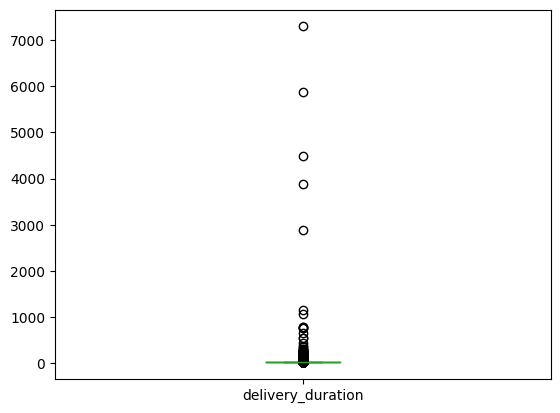

In [34]:
# Check delivery duration using histogram and boxplot

data.delivery_duration.plot(kind='box')

In [31]:
data.day_of_the_week.value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: day_of_the_week, dtype: int64

<Axes: >

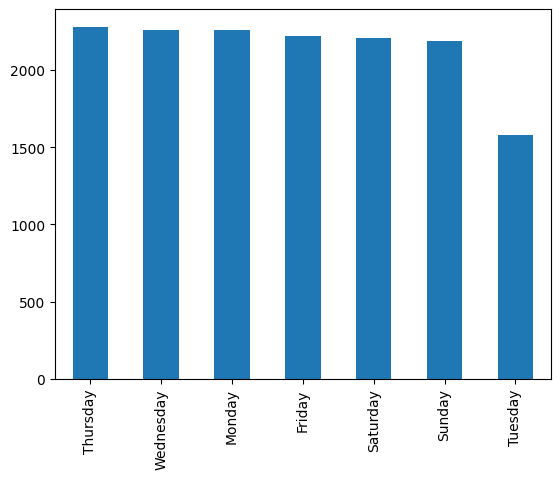

In [30]:
data.day_of_the_week.value_counts().plot(kind='bar')

## Insights
* The mean time of delivery is 20.5 minutes
* The median time of delivery is 15.79 minutes
* Base on the plot above the delivery is always very low on tuesday in comparison to other days
* The data contains a whole lot of outliers with the maximum value being equal to 7000 minute while the median value is 15
* We can't drop the dataset since it will be  manipulative on mr kanav side to hide the details of the orders he failed to deliver on time
* Mr Kanav will still remain in business because the 95 percentile is 27 minutes inessence 95 percent of the delivery were deliver before 28 minutes